<a href="https://colab.research.google.com/github/Beta628427/Tesis/blob/master/2_Beta___Cod/Beta_PCA/PCA_Cod_master_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CODIGO MASTER PCA _ BETA

## En escodigo encontraremos PCA aplicado a los datos mmc3

__ Versión 1.0 __

In [145]:
pip install mglearn

In [0]:
import gspread, sklearn, mglearn, time, pandas as pd, numpy as np, scipy as sc
import matplotlib.pyplot as plt
from oauth2client.client import GoogleCredentials
from google.colab import auth
from sklearn.decomposition import PCA
from IPython.display import clear_output

# Autoriza Drive_BETA
auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

## Abro <mmc3> y me ubico en "Joint Rotations"

In [0]:
sh            = gc.open('mmc3')                   # Abro documento 
worksheet     = sh.worksheet("Joint Rotations")   # Entro a la pestaña de Excel
rows          = worksheet.get_all_values()        # Saco todos los valores
df            = pd.DataFrame.from_records(rows)   # Guardo en una tabla panda

In [148]:
pd.DataFrame(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
0,Angle [°],% Gait Cycle,Natural,,,XS,,,S,,,M,,,L,,,Toe,,,Heel,,,Ascending,,,Descending,,,Natural,,,XS,,,S,,,M,,,L,,,Toe,,,Heel,,,Ascending,,,Descending,,
1,Pelvic Ant/Posterior Tilt,0,-7.28,-2.8,1.6,-7.2,-3.7,-0.2,-7.1,-2.6,1.9,-8.2,-3.6,1.0,-9.4,-4.4,0.5,-10.9,-6.5,-2.1,-12.4,-7.9,-3.4,-8.1,-3.3,1.6,-7.0,-2.4,2.2,-16.4,-9.3,-2.3,-15.7,-9.4,-3.1,-16.9,-9.1,-1.2,-14.6,-8.8,-3.0,-17.3,-12.8,-8.3,-19.0,-12.9,-6.7,-21.4,-14.7,-8.0,-18.0,-11.7,-5.4,-15.9,-9.2,-2.5
2,Pelvic Ant/Posterior Tilt,1,-7.2,-2.8,1.6,-7.2,-3.7,-0.3,-7.0,-2.6,1.8,-8.2,-3.6,1.0,-9.2,-4.4,0.5,-10.8,-6.4,-2.1,-12.3,-7.8,-3.3,-8.5,-3.7,1.1,-7.1,-2.6,1.9,-16.4,-9.4,-2.4,-15.9,-9.5,-3.2,-16.9,-9.1,-1.2,-14.7,-8.9,-3.0,-17.3,-12.8,-8.3,-19.0,-12.8,-6.7,-21.3,-14.6,-8.0,-18.3,-12.0,-5.7,-15.9,-9.2,-2.5
3,Pelvic Ant/Posterior Tilt,2,-7.2,-2.8,1.6,-7.2,-3.8,-0.4,-7.0,-2.6,1.8,-8.2,-3.5,1.1,-9.2,-4.3,0.5,-10.6,-6.3,-2.1,-12.2,-7.7,-3.2,-8.9,-4.1,0.6,-7.3,-2.8,1.7,-16.5,-9.5,-2.5,-16.1,-9.7,-3.3,-17.0,-9.2,-1.3,-14.8,-9.0,-3.2,-17.3,-12.9,-8.5,-18.9,-12.8,-6.8,-21.3,-14.7,-8.1,-18.6,-12.3,-6.0,-16.0,-9.3,-2.6
4,Pelvic Ant/Posterior Tilt,3,-7.2,-2.7,1.7,-7.2,-3.8,-0.4,-7.0,-2.6,1.8,-8.1,-3.5,1.2,-9.1,-4.3,0.6,-10.5,-6.3,-2.0,-12.2,-7.7,-3.2,-9.3,-4.6,0.0,-7.4,-2.9,1.6,-16.7,-9.6,-2.6,-16.3,-9.8,-3.4,-17.1,-9.2,-1.4,-15.0,-9.1,-3.3,-17.4,-13.1,-8.8,-18.8,-12.9,-6.9,-21.4,-14.8,-8.3,-19.0,-12.7,-6.4,-16.1,-9.4,-2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,Foot Int/External Rotation,96,-21.1,-13.4,-5.7,-18.6,-12.5,-6.3,-22.7,-14.1,-5.4,-19.8,-12.4,-5.0,-20.8,-12.2,-3.5,-13.6,-7.0,-0.4,-22.7,-14.7,-6.8,-21.0,-12.9,-4.8,-24.4,-12.4,-0.5,-19.8,-12.9,-6.0,-18.9,-12.3,-5.6,-20.2,-13.5,-6.9,-19.7,-13.1,-6.5,-17.2,-11.9,-6.5,-9.8,-4.0,1.9,-20.8,-14.7,-8.6,-21.4,-14.4,-7.3,-20.1,-13.2,-6.4
1411,Foot Int/External Rotation,97,-20.7,-13.1,-5.6,-18.5,-12.3,-6.1,-22.3,-13.9,-5.5,-19.4,-12.1,-4.9,-20.2,-11.8,-3.3,-13.5,-6.8,-0.2,-22.6,-14.6,-6.5,-20.1,-11.6,-3.1,-23.9,-11.6,0.6,-19.4,-12.6,-5.8,-18.9,-12.2,-5.4,-19.9,-13.2,-6.5,-19.1,-12.8,-6.4,-16.7,-11.3,-5.8,-9.4,-3.7,2.1,-20.5,-14.5,-8.4,-20.3,-13.2,-6.1,-19.5,-12.7,-5.9
1412,Foot Int/External Rotation,98,-20.1,-12.9,-5.7,-18.3,-12.0,-5.8,-21.6,-13.6,-5.5,-18.9,-11.9,-4.9,-19.6,-11.4,-3.2,-13.6,-6.9,-0.1,-22.4,-14.3,-6.2,-19.4,-10.6,-1.8,-23.5,-11.0,1.6,-19.0,-12.3,-5.6,-18.8,-12.0,-5.2,-19.4,-12.8,-6.2,-18.5,-12.4,-6.2,-16.4,-10.7,-4.9,-9.0,-3.4,2.3,-20.2,-14.1,-8.1,-19.4,-12.2,-5.0,-19.0,-12.2,-5.4
1413,Foot Int/External Rotation,99,-19.4,-12.5,-5.6,-18.0,-11.6,-5.3,-21.0,-13.1,-5.3,-18.3,-11.6,-4.9,-18.9,-11.0,-3.2,-13.9,-7.0,-0.1,-22.2,-14.1,-6.0,-18.9,-9.8,-0.7,-23.3,-10.5,2.3,-18.4,-11.8,-5.3,-18.5,-11.7,-4.9,-18.8,-12.3,-5.8,-17.8,-11.9,-6.0,-16.1,-10.1,-4.1,-8.7,-3.2,2.4,-19.7,-13.8,-7.9,-18.9,-11.5,-4.2,-18.6,-11.9,-5.1


## Función de realizar numeros aleatorios con una media y una desviacion estandar especifica


In [0]:
# PROCESO DE GENERAR NUMEROS ALEATORIOS CON PROMEDIO Y DESVIACION ESTANDAR 
# DESEADOS
#···············································································
num_samples     = 20     # Numero de numeros aleatorios a generar
desired_mean    = -2.8   # promedio de numeros aleatorios
desired_std_dev = 8.9    # Desviacion estandar a numeros aleatorios a generar
#···············································································
# Funcion de variables aleatorias con media y desviacion estandar
def var_alea (num_samples,desired_mean,desired_std_dev):
  samples = np.random.normal(loc=0.0, scale=desired_std_dev, size=num_samples)
  actual_mean = np.mean(samples)
  actual_std = np.std(samples)
  #print("Initial samples stats   : mean = {:.4f} stdv = {:.4f}".
  #      format(actual_mean, actual_std))
  zero_mean_samples = samples - (actual_mean)
  zero_mean_mean = np.mean(zero_mean_samples)
  zero_mean_std = np.std(zero_mean_samples)
  #print("True zero samples stats : mean = {:.4f} stdv = {:.4f}".
  #      format(zero_mean_mean, zero_mean_std))
  scaled_samples = zero_mean_samples * (desired_std_dev/zero_mean_std)
  scaled_mean = np.mean(scaled_samples)
  scaled_std = np.std(scaled_samples)
  #print("Scaled samples stats    : mean = {:.4f} stdv = {:.4f}".
  #      format(scaled_mean, scaled_std))
  final_samples = scaled_samples + desired_mean
  final_mean = np.mean(final_samples)
  final_std = np.std(final_samples)
  #print("Final samples stats     : mean = {:.4f} stdv = {:.4f}".
  #      format(final_mean, final_std))
  #print(final_samples)
  return(final_samples)

### ¡Aquí! vuelvo una tabla en 20 tablas que almacena las variables tanto de jovenes como las de viejos de los targets < "Natural","XS","S","M","L","Toe","Heel","Ascending","Descending" > con media y desviacion dada:

#### 1) la media es el valor medio de cada target
#### 2) la desviacion estandar es la suma de los valores absolutos de la desviacion estandar positima mas la negativa.

#### Nota····································································
#### solo salieron 25 lineas de codigo XD solo que para que se vea mas bonito consume mas lineas 

\\(·w·)/


In [0]:
# Seleccionando de la sheet "Joint Rotations"
# ······· Pelvic_Ant_Posterior_Tilt
f_1 = 1   # fila de inicio Pelvic_Ant_Posterior_Tilt
f_2 = 102 # final final    Pelvic_Ant_Posterior_Tilt
targets         = df.iloc[0,:]
targets         = pd.DataFrame(targets[np.newaxis,:])
ta              = pd.DataFrame(np.array(df.iloc[f_1:f_2,:]))
tabla           = pd.DataFrame(ta)
target_colum = ['Angle [°]', '% Gait Cycle', 
                'joven_Natural-',   'joven_Natural',   'joven_Natural+', 
                'joven_XS-',        'joven_XS',        'joven_XS+', 
                'joven_S-',         'joven_S',         'joven_S+', 
                'joven_M-',         'joven_M',         'joven_M+', 
                'joven_L-',         'joven_L',         'joven_L+', 
                'joven_Toe-',       'joven_Toe',       'joven_Toe+', 
                'joven_Heel-',      'joven_Heel',      'joven_Heel+', 
                'joven_Ascending-', 'joven_Ascending', 'joven_Ascending+', 
                'joven_Descending-','joven_Descending','joven_Descending+',
                'viejo_Natural-',   'viejo_Natural',   'viejo_Natural+', 
                'viejo_XS-',        'viejo_XS',        'viejo_XS+', 
                'viejo_S-',         'viejo_S',         'viejo_S+', 
                'viejo_M-',         'viejo_M',         'viejo_M+', 
                'viejo_L-',         'viejo_L',         'viejo_L+', 
                'viejo_Toe-',       'viejo_Toe',       'viejo_Toe+', 
                'viejo_Heel-',      'viejo_Heel',      'viejo_Heel+', 
                'viejo_Ascending-', 'viejo_Ascending', 'viejo_Ascending+', 
                'viejo_Descending-','viejo_Descending','viejo_Descending+']
tabla.columns = target_colum # Agregarle targets a las columnas de tabla
#···············································································
# Variables diccionario de las tablas de 20 personas para jovenes y adultas
per = [""   ,"p1" ,"p2" ,"p3" ,"p4" ,"p5" ,"p6" ,"p7" ,"p8" ,"p9" ,"p10",
       "p11","p12","p13","p14","p15","p16","p17","p18","p19","p20"]
personas= {per[1]:[] ,per[2]:[] ,per[3]:[] ,per[4]:[] ,per[5] :[],
           per[6]:[] ,per[7]:[] ,per[8]:[] ,per[9]:[] ,per[10]:[],
           per[11]:[],per[12]:[],per[13]:[],per[14]:[],per[15]:[],
           per[16]:[],per[17]:[],per[18]:[],per[19]:[],per[20]:[]}
target_colum_ = ['% Gait Cycle','joven_Natural','joven_XS',
                 'joven_S','joven_M','joven_L','joven_Toe','joven_Heel', 
                 'joven_Ascending','joven_Descending','viejo_Natural',
                 'viejo_XS','viejo_S','viejo_M','viejo_L','viejo_Toe',
                 'viejo_Heel','viejo_Ascending','viejo_Descending']
for i in range(1,21):
  personas[per[i]] = pd.DataFrame(np.zeros((101,19)))
  personas[per[i]].columns = target_colum_
#···············································································
# Lleno las distinatas tablas de personas
j_v = ["joven","viejo"]
tag = ["Natural","XS","S","M","L","Toe","Heel","Ascending","Descending"]
for _j_v in j_v:
  for _tag in tag:
    vari = _j_v+"_"+_tag
    for i in range(tabla[vari].shape[0]):
      mean = tabla[vari][i]
      _mas = tabla[vari+"+"][i]
      _men = tabla[vari+"-"][i]
      DE   = abs(float(_mas))+abs(float(_men))
      NP   = pd.DataFrame(per).shape[0] # numero de personas
      num_gener = var_alea(NP,float(mean),DE) # genero los numeros aleatorios
      #print(str(i)+str(num_gener))
      for _per in range(1,pd.DataFrame(per).shape[0]):
        #print("\nper = "+str(_per))
        #print("vari = "+str(vari))
        personas[per[_per]][vari][i] = num_gener[_per]
        #print("Lista la persona = "+per[_per])

### PLOTEO EL DICCIONARIO DE PERSONAS <Pelvic Ant/Posterior Tilt>:
#### 1) Este diccionario tiene almacenadas los datos de las 20 personas
#### 2) Por personas hay datos de jovenes y adultos de los difernetes targets

In [151]:
personas

{'p1':      % Gait Cycle  joven_Natural  ...  viejo_Ascending  viejo_Descending
 0             0.0     -19.833767  ...         2.960607        -34.712630
 1             0.0      -6.777502  ...       -31.940851          0.280762
 2             0.0      -5.087470  ...         7.193013        -13.236238
 3             0.0      -7.650653  ...       -26.536706          6.989126
 4             0.0       9.363969  ...       -49.640339        -21.393583
 ..            ...            ...  ...              ...               ...
 96            0.0     -18.176151  ...        20.073556         -5.094252
 97            0.0     -14.205672  ...       -26.784326          6.906245
 98            0.0     -18.657984  ...         5.687116        -25.697189
 99            0.0     -12.741742  ...         0.343124         -5.103294
 100           0.0       5.956824  ...       -28.649136        -10.698937
 
 [101 rows x 19 columns],
 'p10':      % Gait Cycle  joven_Natural  ...  viejo_Ascending  viejo_Descendi

In [152]:
pd.DataFrame(personas["p1"])

,% Gait Cycle,joven_Natural,joven_XS,joven_S,joven_M,joven_L,joven_Toe,joven_Heel,joven_Ascending,joven_Descending,viejo_Natural,viejo_XS,viejo_S,viejo_M,viejo_L,viejo_Toe,viejo_Heel,viejo_Ascending,viejo_Descending
0,0.0,-19.833767,-6.220000,-12.811346,-7.794117,-13.056900,3.295564,2.573007,10.048416,-10.718083,-2.728016,-25.032311,-13.147375,-27.657378,-3.195755,22.368714,-48.528504,2.960607,-34.712630
1,0.0,-6.777502,-10.882902,9.388181,6.387591,0.507362,-12.783608,17.684137,-17.642174,16.542326,23.990349,-9.017128,-5.098681,-8.336913,-21.686735,-0.916025,40.842330,-31.940851,0.280762
2,0.0,-5.087470,-2.221549,-3.273210,0.140960,-11.907004,-2.109220,12.657061,-11.442429,10.601639,-13.437429,-5.932379,5.838586,15.696987,7.278317,18.695021,-23.593520,7.193013,-13.236238
3,0.0,-7.650653,-4.192819,-1.756209,9.681496,-1.824022,-27.160931,-20.974567,4.550437,-8.308159,-10.554116,-1.807141,-43.248212,11.346966,-17.172788,-42.237416,-78.585195,-26.536706,6.989126
4,0.0,9.363969,2.714055,-10.462201,4.479940,-23.277883,0.172666,30.909811,12.685820,0.023372,-6.170703,-29.757215,-44.579132,1.149569,-25.013626,14.473966,2.547019,-49.640339,-21.393583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.0,-18.176151,4.400035,-15.897972,-1.781663,13.661427,7.279163,-13.640533,-7.843889,-1.908265,-7.400113,-23.034958,-2.140779,1.703770,19.591103,9.328356,-33.738533,20.073556,-5.094252
97,0.0,-14.205672,-2.120141,12.112179,4.039589,3.188734,6.774674,-31.320295,-33.094118,-2.397444,0.059580,-20.682426,10.613237,17.043059,11.473071,-30.410400,-3.317413,-26.784326,6.906245
98,0.0,-18.657984,-2.182446,-4.926999,-3.736503,-6.471230,-19.277925,-24.681796,-22.056537,8.249166,-7.138912,18.542453,-17.758171,-5.997631,-40.081302,-14.590384,-33.983937,5.687116,-25.697189
99,0.0,-12.741742,5.997949,4.919985,2.285130,3.187571,-5.316764,13.544326,-12.934510,-15.949237,-1.916315,-22.536236,5.902744,0.343273,-4.467240,-75.391324,-18.861911,0.343124,-5.103294


In [153]:
pd.DataFrame(personas["p10"])

,% Gait Cycle,joven_Natural,joven_XS,joven_S,joven_M,joven_L,joven_Toe,joven_Heel,joven_Ascending,joven_Descending,viejo_Natural,viejo_XS,viejo_S,viejo_M,viejo_L,viejo_Toe,viejo_Heel,viejo_Ascending,viejo_Descending
0,0.0,-1.868084,1.527932,-8.373921,-16.817172,-13.239687,-20.149455,-27.398834,-0.848261,3.000749,-9.406657,-19.871481,8.463172,-38.227257,-17.684391,-47.617840,-20.800691,-23.934926,-32.186063
1,0.0,11.883311,-0.140429,3.982423,-15.111695,-2.560086,2.499141,-11.565380,-12.062885,13.515365,0.256096,-19.870565,-23.020588,-7.941380,-32.471809,-2.483347,-37.867552,-27.510720,-26.815482
2,0.0,-6.391765,-8.157418,0.748919,-2.672647,-20.852860,-4.766643,0.434738,-5.211835,-6.909776,-29.302667,-27.218553,-53.340026,-22.989024,-9.334713,-63.688226,-33.170476,-8.062397,8.524758
3,0.0,-5.148709,-2.679450,10.344194,-0.519443,12.860092,6.394466,-12.579224,-0.212252,11.577933,-5.490833,-21.146041,18.310239,-41.455150,-0.719422,16.814358,12.951913,-51.411376,-22.560296
4,0.0,-7.789149,-6.444522,-7.997549,-6.468977,-28.000164,-10.055200,5.964664,-19.600693,-3.264164,19.183415,11.619875,-5.497356,4.191507,-9.098086,14.111727,-29.906423,16.748306,-15.098423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.0,-4.325352,-7.752995,-1.001996,-7.264524,2.889102,-26.177380,-17.924944,7.670550,-6.356436,8.467861,4.742731,-33.379246,15.361864,-2.649488,-27.221753,-40.405006,-4.656240,-35.059156
97,0.0,15.566969,14.315275,-9.187367,17.720863,3.251164,1.511001,10.954399,8.288920,0.883888,-30.169969,-8.115510,7.203761,-29.932294,21.890648,-14.671301,-60.685909,-12.750386,-41.374742
98,0.0,18.739292,-17.165910,-6.302548,-23.912080,-16.648874,-14.933361,6.801025,27.044926,-11.277461,-0.164367,0.688869,10.323599,9.482528,-15.737117,-41.823872,-41.714111,7.676245,25.500354
99,0.0,-7.524439,-5.654418,-1.576386,-12.976891,5.057801,-10.976604,-39.773885,19.772532,-10.722733,32.230696,-25.231597,7.215167,16.780712,-27.515641,-9.249147,4.020171,10.169380,1.665179


In [154]:
pd.DataFrame(personas["p20"])

,% Gait Cycle,joven_Natural,joven_XS,joven_S,joven_M,joven_L,joven_Toe,joven_Heel,joven_Ascending,joven_Descending,viejo_Natural,viejo_XS,viejo_S,viejo_M,viejo_L,viejo_Toe,viejo_Heel,viejo_Ascending,viejo_Descending
0,0.0,9.579116,-1.465488,5.370251,-0.001392,-18.332271,18.427373,-35.860543,0.733598,-10.866497,1.254709,-8.271123,-21.440093,4.157181,28.442398,26.219864,-3.315340,-46.297272,11.966161
1,0.0,-6.017072,-15.946092,-4.497685,5.100003,-3.529653,10.090760,-2.406201,-9.245199,-14.169994,-17.050101,23.829816,25.168772,23.954442,19.905568,-10.130961,-33.479967,-18.927116,-21.294305
2,0.0,-17.926603,-7.926677,6.956684,-1.958259,-3.947733,-4.729825,-36.024275,-9.002620,-14.906721,-16.452270,0.254349,-8.475289,-6.041896,22.441159,-37.409634,-12.705686,-8.150421,4.914618
3,0.0,-2.733625,4.362858,-3.912489,-15.576013,-18.112462,-13.043103,-22.748353,-11.570092,-0.665552,-37.469664,-39.169374,-15.134379,9.753373,-3.999287,-13.645014,-26.605170,28.730132,-7.436512
4,0.0,-11.596711,0.360972,9.894337,8.360880,-1.774465,7.771498,-9.434261,-23.665617,4.909212,19.044262,3.599945,12.134125,-45.940552,-25.406768,29.296404,-51.549639,35.212393,7.969679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.0,-7.935543,-8.251055,-18.557949,3.251306,3.303516,-18.133208,-6.870839,-11.394367,3.456287,3.939413,-32.175606,-4.088195,-18.074517,30.460088,45.660577,38.845783,-9.806184,-14.551014
97,0.0,-7.244493,-9.559788,1.549972,-4.297497,-19.702990,-35.196865,-10.289630,-22.054123,-22.436608,21.702019,-12.444784,-15.070272,-35.676484,-17.977481,3.068138,4.809059,-36.596400,-19.245819
98,0.0,-19.679452,-4.724526,-6.886032,-2.371033,8.017527,-9.761938,14.854771,21.635482,-6.854770,-19.014593,-26.033558,-19.126656,8.468133,4.743439,-4.228061,-44.296648,-9.470167,-35.401225
99,0.0,1.528744,-3.534149,-4.531811,8.842798,4.539138,-2.800828,10.641303,13.241769,-16.211351,-1.532786,-12.984308,-29.088352,-17.911424,-35.733845,-3.405258,-28.409359,21.964594,-7.792050


In [155]:
pd.DataFrame(personas["p1"]["joven_XS"])

,joven_XS
0,-6.220000
1,-10.882902
2,-2.221549
3,-4.192819
4,2.714055
...,...
96,4.400035
97,-2.120141
98,-2.182446
99,5.997949


In [156]:
pd.DataFrame(personas["p1"]["viejo_XS"])

,viejo_XS
0,-25.032311
1,-9.017128
2,-5.932379
3,-1.807141
4,-29.757215
...,...
96,-23.034958
97,-20.682426
98,18.542453
99,-22.536236


  ### Guardamos la info en un Google Sheet de las diferentes personas de las pruebas

In [0]:
gc.create("mmc3_personas")
sh2 = gc.open('mmc3_personas')

In [158]:
# Creamos un documento Google sheet para poner la informacion de las 20 personas
# OJO! Solo correr una vez
gc.create("mmc3_personas")
sh2 = gc.open('mmc3_personas')
for i in range(1,21):
  sh2.add_worksheet(title=per[i],rows='110',cols='25')
sh2.add_worksheet(title='MMC3',rows='1450',cols='60')

<Worksheet 'MMC3' id:665646179>

In [159]:
# Examina información de la persona a su target
personas[per[1]][target_colum_[1]][0]

-19.833767496173493

In [160]:
wks    = sh2.worksheet(per[1])
wks.update_acell('A1',"beta")

{'spreadsheetId': '1kFkuLDWsMech7ookVZ4VnSepMoD-9KaL300HkVvhADA',
 'updatedCells': 1,
 'updatedColumns': 1,
 'updatedRange': "'p1'!A1",
 'updatedRows': 1}

In [189]:
abc = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R',
       'S','T','U','V','W','X','Y','Z',
       'AA','AB','AC','AD','AE','AF','AG','AH','AI','AJ','AK','AL','AM','AN',
       'AO','AP','AQ','AR','AS','AT','AU','AV','AW','AX','AY','AZ',
       'BA','BB','BC','BD','BE','BF','BG','BH','BI','BJ','BK','BL','BM','BN',
       'BO','BP','BQ','BR','BS','BT','BU','BV','BW','BX','BY','BZ']
#···············································································
# en el Google sheet mmc3_personas
# Actualizo los targets de columnas en Google sheet por cada pagina de personas
for i in range(1,pd.DataFrame(per).shape[0]):
  wks    = sh2.worksheet(per[i])
  for j in range(pd.DataFrame(target_colum_).shape[0]):
      wks.update_acell(abc[j]+'1',target_colum_[j])
# Actualizo los targets del sheet "MMC3" con los mismos target de columnas que
# el mmc3
wks    = sh2.worksheet("MMC3")
for i in range(pd.DataFrame(target_colum).shape[0]):
  print("======== "+str(i))
  print(target_colum[i])
  print(abc[i])
  wks.update_acell(abc[i]+'1',target_colum[i])
#···············································································
# Lleno todas las tablas del Google sheet mmc3_personas


======== 0
Angle [°]
A
======== 1
% Gait Cycle
B
======== 2
joven_Natural-
C
======== 3
joven_Natural
D
======== 4
joven_Natural+
E
======== 5
joven_XS-
F
======== 6
joven_XS
G
======== 7
joven_XS+
H
======== 8
joven_S-
I
======== 9
joven_S
J
======== 10
joven_S+
K
======== 11
joven_M-
L
======== 12
joven_M
M
======== 13
joven_M+
N
======== 14
joven_L-
O
======== 15
joven_L
P
======== 16
joven_L+
Q
======== 17
joven_Toe-
R
======== 18
joven_Toe
S
======== 19
joven_Toe+
T
======== 20
joven_Heel-
U
======== 21
joven_Heel
V
======== 22
joven_Heel+
W
======== 23
joven_Ascending-
X
======== 24
joven_Ascending
Y
======== 25
joven_Ascending+
Z
======== 26
joven_Descending-
AA
======== 27
joven_Descending
AB
======== 28
joven_Descending+
AC
======== 29
viejo_Natural-
AD
======== 30
viejo_Natural
AE
======== 31
viejo_Natural+
AF
======== 32
viejo_XS-
AG
======== 33
viejo_XS
AH
======== 34
viejo_XS+
AI
======== 35
viejo_S-
AJ
======== 36
viejo_S
AK
======== 37
viejo_S+
AL
======== 38
viejo_M-
AM

# CONTINUARA!!!!!!!
## MODIFICAR LOS PCA POR Q SE CAMBIO EL DATASET

In [162]:
targets                       = df.iloc[0,:]
targets                       = pd.DataFrame(targets[np.newaxis,:])
Pelvic_Ant_Posterior_Tilt     = np.concatenate((np.array(targets),np.array(df.iloc[1:102,:])),axis=0)
# creo X
fila_1 = 1
fila_2 = fila_1 + 101
# concateno de 0-100% con los valores q deseo graficar como coordenadas X
X1 = np.concatenate((np.array(df.iloc[fila_1:fila_2,[1]]),np.array(df.iloc[fila_1:fila_2,[3,6,7,12,15,18,21,24,27]])),   axis=1)
X2 = np.concatenate((np.array(df.iloc[fila_1:fila_2,[1]]),np.array(df.iloc[fila_1:fila_2,[30,33,36,39,42,45,48,51,54]])),axis=1)
pd.DataFrame(X1)
X  = np.concatenate((X1,X2),axis=0)
pd.DataFrame(X)
# creo Y
Y = []
for i in range(X1.shape[0]):
  Y.append(int(0))
for i in range(X2.shape[0]):
  Y.append(int(1))
#
Y = np.array(Y)
print(pd.DataFrame(X))
#
print(type(X))
print(type(Y))


       0     1     2     3     4      5      6      7      8      9
0      0  -2.8  -3.7  -0.2  -3.6   -4.4   -6.5   -7.9   -3.3   -2.4
1      1  -2.8  -3.7  -0.3  -3.6   -4.4   -6.4   -7.8   -3.7   -2.6
2      2  -2.8  -3.8  -0.4  -3.5   -4.3   -6.3   -7.7   -4.1   -2.8
3      3  -2.7  -3.8  -0.4  -3.5   -4.3   -6.3   -7.7   -4.6   -2.9
4      4  -2.7  -3.8  -0.5  -3.4   -4.2   -6.2   -7.6   -5.1   -3.0
..   ...   ...   ...   ...   ...    ...    ...    ...    ...    ...
197   96  -8.5  -8.9  -8.4  -7.9  -11.7  -12.3  -14.4  -13.3   -9.9
198   97  -8.6  -9.0  -8.5  -7.9  -11.7  -12.3  -14.4  -13.1   -9.9
199   98  -8.7  -9.1  -8.5  -8.0  -11.7  -12.3  -14.3  -12.8   -9.9
200   99  -8.7  -9.1  -8.6  -8.0  -11.7  -12.3  -14.3  -12.6  -10.0
201  100  -8.8  -9.2  -8.6  -8.0  -11.6  -12.3  -14.2  -12.3  -10.0

[202 rows x 10 columns]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [0]:
X = np.array(X)
Y = Y[:, np.newaxis]

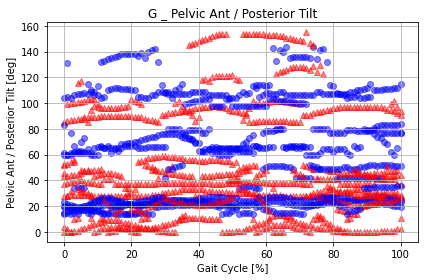

In [164]:
for i in range(1,10):
  plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, i], color='red',  marker='^', alpha=0.5) # jovenes
  plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, i], color='blue', marker='o', alpha=0.5) # viejos
  
plt.grid(True)
plt.title("G _ Pelvic Ant / Posterior Tilt")
plt.xlabel("Gait Cycle [%]")
plt.ylabel("Pelvic Ant / Posterior Tilt [deg]")
plt.yscale('linear')
plt.xscale('linear')
plt.tight_layout()
plt.show()

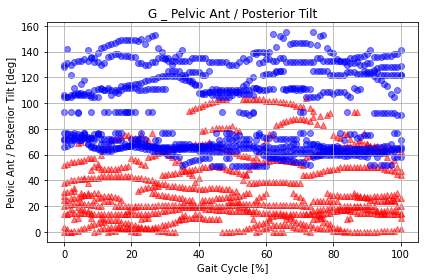

In [165]:
plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], color='red',  marker='^', alpha=0.5) # jovenes
plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 2], color='red',  marker='^', alpha=0.5) # jovenes
plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 3], color='red',  marker='^', alpha=0.5) # jovenes
plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 4], color='red',  marker='^', alpha=0.5) # jovenes
plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 5], color='red',  marker='^', alpha=0.5) # jovenes
plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 6], color='red',  marker='^', alpha=0.5) # jovenes
plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 7], color='red',  marker='^', alpha=0.5) # jovenes
plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 8], color='red',  marker='^', alpha=0.5) # jovenes
plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 9], color='red',  marker='^', alpha=0.5) # jovenes

plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], color='blue', marker='o', alpha=0.5) # viejos
plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 2], color='blue', marker='o', alpha=0.5) # viejos
plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 3], color='blue', marker='o', alpha=0.5) # viejos
plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 4], color='blue', marker='o', alpha=0.5) # viejos
plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 5], color='blue', marker='o', alpha=0.5) # viejos
plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 6], color='blue', marker='o', alpha=0.5) # viejos
plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 7], color='blue', marker='o', alpha=0.5) # viejos
plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 8], color='blue', marker='o', alpha=0.5) # viejos
plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 9], color='blue', marker='o', alpha=0.5) # viejos

plt.grid(True)
plt.title("G _ Pelvic Ant / Posterior Tilt")
plt.xlabel("Gait Cycle [%]")
plt.ylabel("Pelvic Ant / Posterior Tilt [deg]")
plt.yscale('linear')
plt.xscale('linear')
plt.tight_layout()
plt.show()

In [0]:
from sklearn.decomposition import PCA
#
pca=PCA(n_components=2)
pca.fit(X)
#
transformada=pca.transform(X)

In [167]:
transformada.shape

(202, 2)

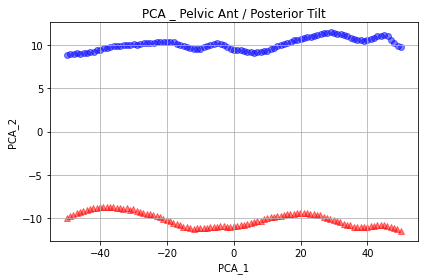

In [168]:
plt.scatter(transformada[Y[:,0] == 0,0],transformada[Y[:,0] == 0,1], color='red',  marker='^', alpha=0.5) 
plt.scatter(transformada[Y[:,0] == 1,0],transformada[Y[:,0] == 1,1], color='blue', marker='o', alpha=0.5) 
plt.grid(True)
plt.title("PCA _ Pelvic Ant / Posterior Tilt")
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
plt.yscale('linear')
plt.xscale('linear')
plt.tight_layout()
plt.show()